In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
#rcParams['figure.figsize'] = 12, 8
import re
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Preprocess the Youtube bengali drama Dataset

In [ ]:
df_negative = pd.read_csv('/content/drive/MyDrive/Independent Study-NLP/Bengali_Sentiment-master/Dataset/Paper1_Youtube/all_negative_3307.txt', delimiter='\t', names=['Data'])

In [ ]:
df_negative['Sentiment'] = 0

In [ ]:
df_negative.shape

(3307, 2)

In [ ]:
df_postive = pd.read_csv('/content/drive/MyDrive/Independent Study-NLP/Bengali_Sentiment-master/Dataset/Paper1_Youtube/all_positive_8500.txt', delimiter='\t', names=['Data'])

In [ ]:
df_postive['Sentiment'] = 1

In [ ]:
df_postive.shape

(8500, 2)

In [ ]:
df = pd.concat([df_negative, df_postive], ignore_index=True)

In [ ]:
df

,Data,Sentiment
0,আমার জীবনের সবথেকে ফালতু একটা নাটক এইটা,0
1,সাধারণ মানুষ টিভি চ্যানেল গুলো ছুড়ে ফেলে দিয়...,0
2,স্টুডেন্ট ওরে একটা থাপ্পড় মারো,0
3,নাটকটিতে কথা থেকে মিউজিকের সাউন্ডটা বেশি হয়ে ...,0
4,পাকনা মেয়াটা একটা বাজে,0
...,...,...
11802,নাটকটার এড দেখে বুঝতে পারছি অনেক ভালো লাগবে,1
11803,তিশাকে চশমায় সেই লাগে,1
11804,বাংলা নাটক মানেই মনের মধ্যে একটা অন্যরকম অনুভ...,1
11805,"দেখা শুরু করলাম,, ভাল না হয়ে যাবে কই অপূর্ব ব...",1


In [ ]:
df.to_csv('/content/drive/MyDrive/Independent Study-NLP/Bengali_Sentiment-master/Dataset/Paper1_Youtube/youtube_drama.csv')

In [ ]:
import re

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Independent Study-NLP/Bengali_Sentiment-master/Dataset/Paper1_Youtube/youtube_drama.csv', index_col=0)

In [ ]:
df.reset_index(inplace=True)

In [ ]:
df.drop(['index'], axis=1, inplace=True)

In [ ]:
df

,Data,Sentiment
0,আমার জীবনের সবথেকে ফালতু একটা নাটক এইটা,0
1,সাধারণ মানুষ টিভি চ্যানেল গুলো ছুড়ে ফেলে দিয়...,0
2,স্টুডেন্ট ওরে একটা থাপ্পড় মারো,0
3,নাটকটিতে কথা থেকে মিউজিকের সাউন্ডটা বেশি হয়ে ...,0
4,পাকনা মেয়াটা একটা বাজে,0
...,...,...
11802,নাটকটার এড দেখে বুঝতে পারছি অনেক ভালো লাগবে,1
11803,তিশাকে চশমায় সেই লাগে,1
11804,বাংলা নাটক মানেই মনের মধ্যে একটা অন্যরকম অনুভ...,1
11805,"দেখা শুরু করলাম,, ভাল না হয়ে যাবে কই অপূর্ব ব...",1


In [ ]:
df

,Data,Sentiment
0,আমার জীবনের সবথেকে ফালতু একটা নাটক এইটা,0
1,সাধারণ মানুষ টিভি চ্যানেল গুলো ছুড়ে ফেলে দিয়...,0
2,স্টুডেন্ট ওরে একটা থাপ্পড় মারো,0
3,নাটকটিতে কথা থেকে মিউজিকের সাউন্ডটা বেশি হয়ে ...,0
4,পাকনা মেয়াটা একটা বাজে,0
...,...,...
11802,নাটকটার এড দেখে বুঝতে পারছি অনেক ভালো লাগবে,1
11803,তিশাকে চশমায় সেই লাগে,1
11804,বাংলা নাটক মানেই মনের মধ্যে একটা অন্যরকম অনুভ...,1
11805,"দেখা শুরু করলাম,, ভাল না হয়ে যাবে কই অপূর্ব ব...",1


In [ ]:
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)
  

def foreign_chars(data):
  data = "".join(i for i in data if i in [".","।"] or 2432 <= ord(i) <= 2559 or ord(i)== 32)
  re.sub(' +', ' ', data)
  return data.strip()



In [ ]:
df['Data'] = df['Data'].apply(remove_emojis)
df['Data'] = df['Data'].apply(foreign_chars)

In [ ]:
df.iloc[3783]['Data']

'অসাধারণ নাটক।'

In [36]:
pip install bltk

     |████████████████████████████████| 17.4MB 1.4MB/s 
     |████████████████████████████████| 1.5MB 30.6MB/s 
  Created wheel for bltk: filename=bltk-1.2-cp37-none-any.whl size=17432538 sha256=161eb3502807779e03c1ab468ee570e81289ad788d8c4bb0a253dbf4e0e00308
  Stored in directory: /root/.cache/pip/wheels/8d/a2/28/31c169557c41c3c6c2227874781112102bd01578931f35803f
Successfully built bltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [37]:
from bltk.langtools.banglachars import (vowels,
                                        vowel_signs,
                                        consonants,
                                        digits,
                                        operators,
                                        punctuations,
                                        others)
print(f'Vowels: {vowels}')
print(f'Vowel signs: {vowel_signs}')
print(f'Consonants: {consonants}')
print(f'Digits: {digits}')
print(f'Operators: {operators}')
print(f'Punctuation marks: {punctuations}')
print(f'Others: {others}')

Vowels: ['অ', 'আ', 'ই', 'ঈ', 'উ', 'ঊ', 'ঋ', 'ঌ', 'এ', 'ঐ', 'ও', 'ঔ']
Vowel signs: ['া', 'ি', 'ী', 'ু', 'ূ', 'ৃ', 'ৄ', 'ে', 'ৈ', 'ো', 'ৌ']
Consonants: ['ক', 'খ', 'গ', 'ঘ', 'ঙ', 'চ', 'ছ', 'জ', 'ঝ', 'ঞ', 'ট', 'ঠ', 'ড', 'ঢ', 'ণ', 'ত', 'থ', 'দ', 'ধ', 'ন', 'প', 'ফ', 'ব', 'ভ', 'ম', 'য', 'র', 'ল', 'শ', 'ষ', 'স', 'হ', 'ড়', 'ঢ়', 'য়', 'ৎ', 'ং', 'ঃ', 'ঁ']
Digits: ['০', '১', '২', '৩', '৪', '৫', '৬', '৭', '৮', '৯']
Operators: ['=', '+', '-', '*', '/', '%', '<', '>', '×', '÷']
Punctuation marks: ['।', ',', ';', ':', '?', '!', "'", '.', '"', '-', '[', ']', '{', '}', '(', ')', '–', '—', '―', '~']
Others: ['৳', '৺', '্', 'ঀ', 'ঽ', '#', '$']


In [38]:
def removeDigits_Operators_Punc_Others(string):
  charlist = [c for c in string if c not in digits]
  charlist = [c for c in charlist if c not in operators]
  charlist = [c for c in charlist if c not in punctuations]
  charlist = [c for c in charlist if c not in others]
  charlist = "".join(charlist)
  return charlist



In [ ]:
df['Data'] = df['Data'].apply(removeDigits_Operators_Punc_Others)

Do Train test split

In [17]:
from sklearn.model_selection import train_test_split

In [19]:
def performTrain_Test_Split(dataframe):
  X_train, X_test, y_train, y_test = train_test_split(dataframe['Data'], dataframe['Sentiment'], test_size=0.15, random_state=42)
  print(X_train.shape)
  print(y_train.shape)
  print(X_test.shape)
  print(y_test.shape)
  train = pd.concat([X_train, y_train], axis=1)
  test = pd.concat([X_test, y_test], axis=1)
  print(train.shape)
  print(test.shape)
  return train,test


In [ ]:
train, test = performTrain_Test_Split(df)

In [ ]:
train.head(5)

,Data,Sentiment
532,ভাল হয়নি,0
1983,এক কাহিনী আর কত বড় রোগ ধরা পড়লে সেটা সরাসরি না...,0
971,বাবা মায়ের সাথে এভাবে উচচসবরে কথা বলাটা উচিত হ...,0
2675,ইউটিউবে ভিউ বাড়ানোর লকষযে নাটকের নামে দুদু সোন...,0
8661,নাটকটা অনেক ভালো ছিল,1


In [ ]:
train.to_csv('/content/drive/MyDrive/Independent Study-NLP/Bengali_Sentiment-master/Dataset/Paper1_Youtube/youtube_drama_train.csv', index=False)

In [ ]:
test.to_csv('/content/drive/MyDrive/Independent Study-NLP/Bengali_Sentiment-master/Dataset/Paper1_Youtube/youtube_drama_test.csv', index=False)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Independent Study-NLP/Bengali_Sentiment-master/Dataset/Paper1_Youtube/youtube_drama_train.csv')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


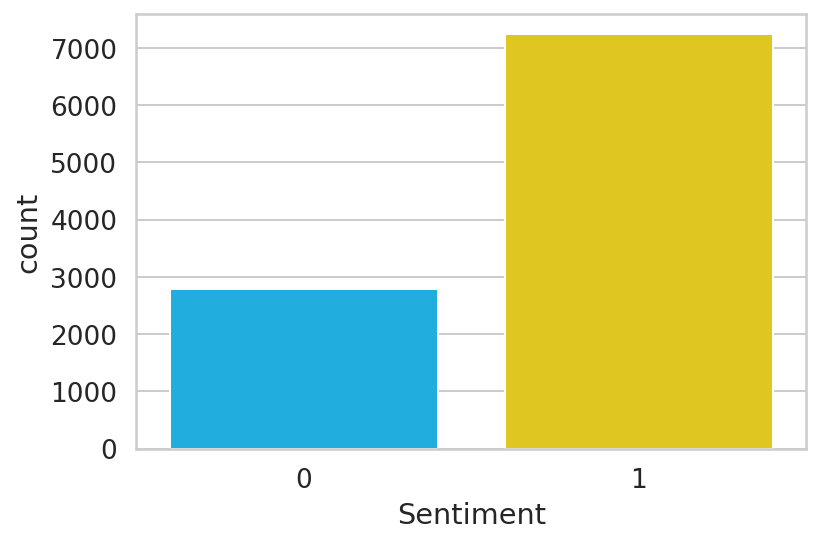

In [ ]:
sns.countplot(df.Sentiment)
plt.xlabel('Sentiment');

###Preporcess Book review Dataset

In [82]:
def preprocess_reviews(review,stopword_path):
  def clean_reviews(review):
    """
    This function will remove the unncessary 
    symbols from a review such as punctuation mark, numbers ,emoji.
    """

    review = review.replace('\n','') #removing new line 
    review = re.sub('[^\u0980-\u09FF]',' ',str(review)) #removing unnecessary punctuation
    return review

  def get_stopwords(filename):
    """
    This function will create a stopwords list from the (.txt) file. 
    """
    stp_words = open(filename,'r',encoding='utf-8').read().split()
    num_of_stopwords = len(stp_words)
    return stp_words,num_of_stopwords

  def remove_stopwords(review,filename):
    """
    This function will remove the stopwords from a review. 
    """
    stp_words,num_of_stopwords =get_stopwords(filename)
    result = review.split()
    reviews = [word.strip() for word in result if word not in stp_words ]
    reviews =" ".join(reviews)
    return reviews   

  review = clean_reviews(review)
  review = remove_stopwords(review,stopword_path)
  return review







Read the Book reviews dataset...with Sentiment 0: Negative and Senitment 1:Positive

In [83]:
df_book_reviews = pd.read_excel('/content/drive/MyDrive/Independent Study-NLP/Bengali_Sentiment-master/Dataset/Paper2_BookReviews/bookReviews_2000.xlsx', index_col=0)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 0 to 2010
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Data       2011 non-null   object
 1   Sentiment  2011 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 127.1+ KB


In [85]:
df_book_reviews.rename(columns={'Review':'Data'},inplace=True)

In [86]:
df_book_reviews.head()

,Data,Sentiment
0,বই টি আমার সংগ্রহে আছে এবং তা আমি পড়েছি। বই টি...,0
1,ফালতু বই। শুধু শুধু টাকা নষ্ট।,0
2,"একটু পড়ে দেখতে বলসিলো, একটু পড়লাম। তারপর হড়হড় ...",0
3,এটা কোন বই? ছিঃ ধিকার জানায়। প্রশাসনের নজর দেয়...,0
4,"প্রিয় রকমারি.কম, দয়া করে বইটি আপনাদের ওয়েবসাইট...",0


In [87]:
df_book_reviews.Sentiment.value_counts()

0    1029
1     982
Name: Sentiment, dtype: int64

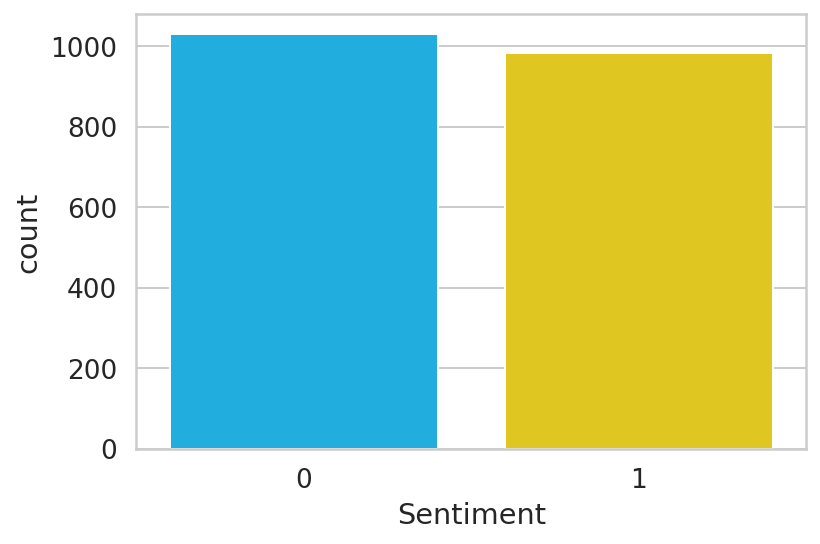

In [88]:
sns.countplot(x='Sentiment',data=df_book_reviews)

In [89]:
stopwords_path= '/content/drive/MyDrive/Independent Study-NLP/Bengali_Sentiment-master/Dataset/Paper2_BookReviews/book_stopwords.txt'
df_book_reviews['Data'] = df_book_reviews['Data'].apply(preprocess_reviews, stopword_path= stopwords_path)

In [90]:
df_book_reviews.iloc[390]

Data         মূল কাহিনীর অনুবাদের অনুবাদের বানানের বানানের ...
Sentiment                                                    0
Name: 390, dtype: object

In [91]:
df_book_reviews['Data'] = df_book_reviews['Data'].apply(removeDigits_Operators_Punc_Others)

In [92]:
df_book_reviews.iloc[29]

Data         অমর একুশে বইমেলা  সুনাম নসট করা জঘনয বই এটি
Sentiment                                              0
Name: 29, dtype: object

In [93]:
book_review_train, book_review_test = performTrain_Test_Split(df_book_reviews)

(1709,)
(1709,)
(302,)
(302,)
(1709, 2)
(302, 2)


In [94]:
book_review_train.head(5)

,Data,Sentiment
1424,এমন বইয়ের অপেকষা করছিলাম ধনযবাদ পারথ সারথি কর ...,1
432,পুরাই ভুয়া ফালতু হয়সে,0
1286,দেশের বিশববিদযালয়ে ধরষণকে কেনদর বইটি লেখা হয়...,1
76,পড়লাম বইটা মাঝখানে কিছুটা বোরিং মনে হয়েছে অনুব...,0
1927,পরথম দশ পৃষঠা মজার এরপরে অদময চরিতরগুলি হাসযকর...,0


In [95]:
book_review_train.to_csv('/content/drive/MyDrive/Independent Study-NLP/Bengali_Sentiment-master/Dataset/Paper2_BookReviews/book_review_train.csv', index=False)

In [96]:
book_review_test.to_csv('/content/drive/MyDrive/Independent Study-NLP/Bengali_Sentiment-master/Dataset/Paper2_BookReviews/book_review_test.csv', index=False)

In [97]:
book_review_test.iloc[34]

Data         নায়কটি দৃ ়তার সাথে চিতরিত হয় না তিনি কিছুটা...
Sentiment                                                    0
Name: 1448, dtype: object